In [1]:
import sys

sys.path.append("../")

In [2]:
from egmn.ConsLaborSeparableModel import LaborPortfolioConsumerType
from HARK.utilities import plot_funcs
import numpy as np
import matplotlib.pyplot as plt

C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
agent = LaborPortfolioConsumerType()
agent.cycles = 10

In [4]:
def plot_3d_func(func, lims_x, lims_y, n=100, label_x="x", label_y="y", label_z="z"):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xmin, xmax = lims_x
    ymin, ymax = lims_y
    xgrid = np.linspace(xmin, xmax, n)
    ygrid = np.linspace(ymin, ymax, n)

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_zlabel(label_z)
    plt.show()

In [5]:
agent.solve()

C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py", line 116, in __eval_spline
    kk = (order).literal_value

  return _eval_linear(*args)


C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py", line 116, in __eval_spline
    kk = (order).literal_value

  return _eval_linear(*args)


C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\alujan\micromamba\envs\egmn-dev\lib\site-packages\interpolation\splines\eval_splines.py", line 116, in __eval_spline
    kk = (order).literal_value

  return _eval_linear(*args)


In [6]:
share_func = agent.solution[0].portfolio_stage.share_func
c_func = agent.solution[0].consumption_stage.c_func
labor_func = agent.solution[0].labor_stage.labor_func
leisure_func = agent.solution[0].labor_stage.leisure_func

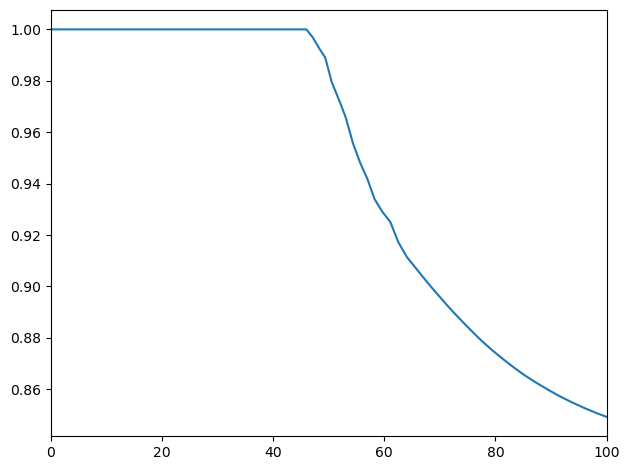

In [7]:
plot_funcs(share_func, 0, 100)

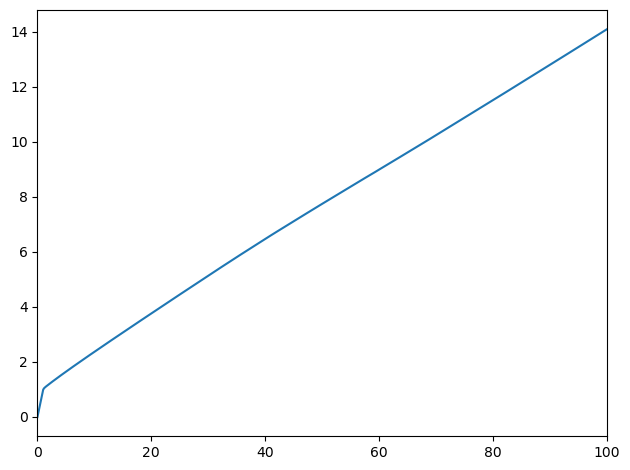

In [8]:
plot_funcs(c_func, 0, 100)

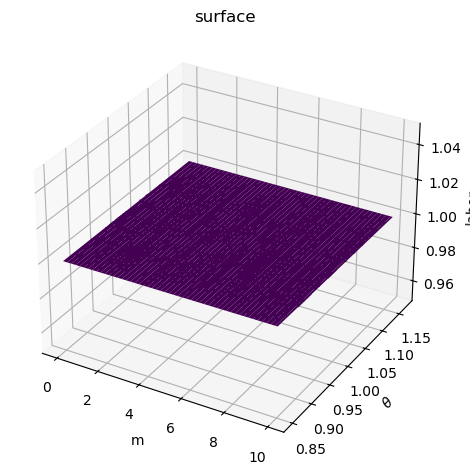

In [9]:
plot_3d_func(
    labor_func,
    (0, 10),
    [min(agent.TranShkGrid), max(agent.TranShkGrid)],
    label_x="m",
    label_y=r"$\theta$",
    label_z="labor",
)

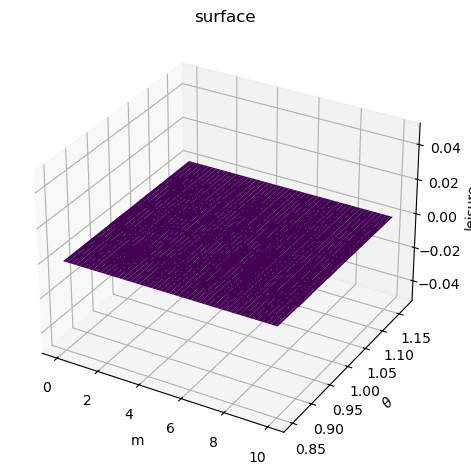

In [10]:
plot_3d_func(
    leisure_func,
    (0, 10),
    [min(agent.TranShkGrid), max(agent.TranShkGrid)],
    label_x="m",
    label_y=r"$\theta$",
    label_z="leisure",
)

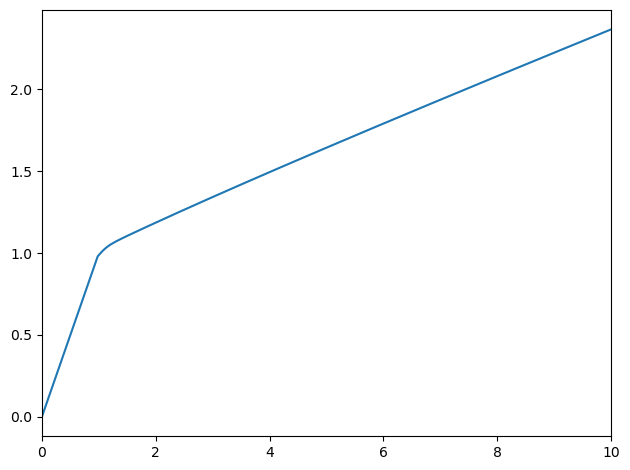

In [11]:
plot_funcs(agent.solution[0].consumption_stage.c_func, 0, 10)